In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import numpy as np
import requests
import json
from doe_api import doe_key


In [2]:
#Academics
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json'
params = {
    'api_key': doe_key,
    'per_page': 150,
    'fields': 'id,'+
    'location.lon,'+
    'location.lat,'+
    'latest.school.name,'+
    'latest.aid.federal_loan_rate,'+
    'latest.cost.title_iv.private.all,'+
    'latest.academics.program_reporter.programs_offered,'+
    'latest.school.tuition_revenue_per_fte,'+
    'latest.student.enrollment.all,'+
    'latest.school.degrees_awarded.highest,'+
    'latest.admissions.sat_scores.midpoint.writing,'+
    'latest.admissions.sat_scores.midpoint.math,'+
    'latest.admissions.sat_scores.midpoint.critical_reading,'+
    'latest.admissions.sat_scores.average.overall,'+
    'latest.admissions.act_scores.midpoint.writing,'+
    'latest.admissions.act_scores.midpoint.math,'+
    'latest.admissions.act_scores.midpoint.english,'+
    #'latest.admissions.act_scores.midpoint.cumulative'+
    'latest.student.retention_rate.four_year.part_time_pooled,'+
    #'latest.student.retention_rate.four_year.full_time_pooled,'+
    #'latest.school.ownership'+
    #'latest.completion.completion_rate_less_than_4yr_150nt,'+
    'latest.completion.completion_rate_4yr_150_white,'+
    'latest.completion.completion_rate_4yr_150_2ormore,'+
    'latest.completion.completion_rate_4yr_150_nhpi,'+
    'latest.completion.completion_rate_4yr_150_hispanic,'+
    'latest.completion.completion_rate_4yr_150_black,'+
    'latest.completion.completion_rate_4yr_150_asian,'+
    'latest.completion.completion_rate_4yr_150_aian,'+
    #'latest.completion.completion_rate_4yr_150nt'+
    
    'page=0'
}

In [3]:
#Initialize an empty list to store the data
academics_data = []
#starting page is 0
params['page'] = 0

#loop that will loop through the page until we reach page 6
while params['page'] < 5:
    #api call
    response = requests.get(url, params=params).json()
    next_page_results = response.get("results", [])
    academics_data.extend(next_page_results)
    #to go to the next page of results
    params['page'] += 1


academics_df = pd.DataFrame(academics_data)
academics_df = academics_df.fillna(0)

In [4]:
academics_df

,latest.school.name,latest.aid.federal_loan_rate,latest.cost.title_iv.private.all,latest.academics.program_reporter.programs_offered,latest.school.tuition_revenue_per_fte,latest.student.enrollment.all,latest.school.degrees_awarded.highest,latest.admissions.sat_scores.midpoint.writing,latest.admissions.sat_scores.midpoint.math,latest.admissions.sat_scores.midpoint.critical_reading,...,latest.completion.completion_rate_4yr_150_white,latest.completion.completion_rate_4yr_150_2ormore,latest.completion.completion_rate_4yr_150_nhpi,latest.completion.completion_rate_4yr_150_hispanic,latest.completion.completion_rate_4yr_150_black,latest.completion.completion_rate_4yr_150_asian,latest.completion.completion_rate_4yr_150_aian,id,location.lat,location.lon
0,Alabama A & M University,0.6552,0.0,0.0,9243.0,0,4,414.0,460.0,475.0,...,0.3043,0.3214,0.0,0.2222,0.2805,0.0000,0.0000,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,0.4401,0.0,0.0,11678.0,0,4,0.0,644.0,637.0,...,0.6276,0.5000,0.0,0.5769,0.5565,0.8354,0.6000,100663,33.505697,-86.799345
2,Amridge University,0.8423,0.0,0.0,14093.0,0,4,0.0,0.0,0.0,...,1.0000,0.0000,0.0,0.0000,0.2857,0.0000,0.0000,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,0.3578,0.0,0.0,8246.0,0,4,0.0,655.0,640.0,...,0.6098,0.6000,0.0,0.6444,0.4845,0.8125,0.6667,100706,34.724557,-86.640449
4,Alabama State University,0.7637,0.0,0.0,8535.0,0,4,0.0,457.0,488.0,...,0.3636,0.0625,0.0,0.4286,0.2844,0.3333,0.0000,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Colorado Christian University,0.4466,206.0,0.0,11648.0,0,4,0.0,0.0,0.0,...,0.6194,0.5000,0.0,0.4419,0.3333,0.5000,0.0000,126669,39.713880,-105.094560
496,Colorado College,0.2365,214.0,0.0,34550.0,0,4,0.0,0.0,0.0,...,0.8743,0.7609,0.0,0.8036,0.7368,0.8966,1.0000,126678,38.848860,-104.822697
497,Concorde Career College-Aurora,0.7053,104.0,10.0,20354.0,0,2,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,126687,39.718699,-104.867089
498,Colorado Mountain College,0.0935,0.0,0.0,2095.0,0,3,0.0,0.0,0.0,...,0.2353,0.2000,0.0,0.3788,0.0000,0.3333,0.3333,126711,39.546360,-107.324441


In [5]:
Data_clean = academics_df.rename(columns={
'latest.school.name' : 'School Name',
'latest.cost.title_iv.private.all' : 'Title 4 Cost Private',
'latest.academics.program_reporter.programs_offered' : 'No.of programs offered',
'latest.school.tuition_revenue_per_fte' : 'Tuition FT Enrollment in $',
'latest.student.enrollment.all': 'Enrollment',
'latest.school.degrees_awarded.highest' : 'Highest degree awarded',
'latest.admissions.sat_scores.midpoint.writing' : 'SAT Writing Midpoint',
'latest.admissions.sat_scores.midpoint.math' : 'SAT Math Midpoint',
'latest.admissions.sat_scores.midpoint.critical_reading' : 'SAT Critical Reading Midpoint',
'latest.admissions.sat_scores.average.overall' : 'SAT Average Overall',
'latest.admissions.act_scores.midpoint.writing' : 'ACT Writing Midpoint',
'latest.admissions.act_scores.midpoint.math' : ' ACT Math Midpoint',
'latest.admissions.act_scores.midpoint.english' : 'ACT English Midpoint',
'latest.student.retention_rate.four_year.full_time_pooled' : 'Retention Rate FT',
'latest.completion.completion_rate_4yr_150_white' : 'Completion Rate 4 year (White)',
'latest.completion.completion_rate_4yr_150_2ormore' : 'Completion Rate 4 year (2 Or More Races)',
'latest.completion.completion_rate_4yr_150_nhpi':'Completion Rate 4 year (Hawaian/Pacific Islander)',
'latest.completion.completion_rate_4yr_150_hispanic':'Completion Rate 4 year (Hispanic)',
'latest.completion.completion_rate_4yr_150_black' : 'Completion Rate 4 year (Black)',
'latest.completion.completion_rate_4yr_150_asian' : 'Completion Rate 4 year (Asian)',
'latest.completion.completion_rate_4yr_150_aian' : 'Completion Rate 4 year (American Indian)',
'latest.completion.completion_rate_4yr_150nt_pooled': 'General Completion Rate',
'latest.aid.federal_loan_rate' : '% of Students receiving Federal Loan',
'location.lon' : 'Longitutde',
'location.lat': 'latitude'
})

In [6]:
Data_clean.columns

Index(['School Name', '% of Students receiving Federal Loan',
       'Title 4 Cost Private', 'No.of programs offered',
       'Tuition FT Enrollment in $', 'Enrollment', 'Highest degree awarded',
       'SAT Writing Midpoint', 'SAT Math Midpoint',
       'SAT Critical Reading Midpoint', 'SAT Average Overall',
       'ACT Writing Midpoint', ' ACT Math Midpoint', 'ACT English Midpoint',
       'latest.student.retention_rate.four_year.part_time_pooled',
       'Completion Rate 4 year (White)',
       'Completion Rate 4 year (2 Or More Races)',
       'Completion Rate 4 year (Hawaian/Pacific Islander)',
       'Completion Rate 4 year (Hispanic)', 'Completion Rate 4 year (Black)',
       'Completion Rate 4 year (Asian)',
       'Completion Rate 4 year (American Indian)', 'id', 'latitude',
       'Longitutde'],
      dtype='object')

In [7]:
Data_clean['Completion Rate 4 year (White)'] = Data_clean['Completion Rate 4 year (White)'] * 100
Data_clean['Completion Rate 4 year (2 Or More Races)'] = Data_clean['Completion Rate 4 year (2 Or More Races)'] * 100
Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)'] = Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)'] * 100
Data_clean['Completion Rate 4 year (Hispanic)'] = Data_clean['Completion Rate 4 year (Hispanic)'] * 100
Data_clean['Completion Rate 4 year (Asian)'] = Data_clean['Completion Rate 4 year (Asian)'] * 100
Data_clean['Completion Rate 4 year (American Indian)'] = Data_clean['Completion Rate 4 year (American Indian)'] * 100
Data_clean['Completion Rate 4 year (Black)'] = Data_clean['Completion Rate 4 year (Black)'] * 100
Data_clean['% of Students receiving Federal Loan'] = Data_clean['% of Students receiving Federal Loan'] * 100


In [8]:
Data_clean

,School Name,% of Students receiving Federal Loan,Title 4 Cost Private,No.of programs offered,Tuition FT Enrollment in $,Enrollment,Highest degree awarded,SAT Writing Midpoint,SAT Math Midpoint,SAT Critical Reading Midpoint,...,Completion Rate 4 year (White),Completion Rate 4 year (2 Or More Races),Completion Rate 4 year (Hawaian/Pacific Islander),Completion Rate 4 year (Hispanic),Completion Rate 4 year (Black),Completion Rate 4 year (Asian),Completion Rate 4 year (American Indian),id,latitude,Longitutde
0,Alabama A & M University,65.52,0.0,0.0,9243.0,0,4,414.0,460.0,475.0,...,30.43,32.14,0.0,22.22,28.05,0.00,0.00,100654,34.783368,-86.568502
1,University of Alabama at Birmingham,44.01,0.0,0.0,11678.0,0,4,0.0,644.0,637.0,...,62.76,50.00,0.0,57.69,55.65,83.54,60.00,100663,33.505697,-86.799345
2,Amridge University,84.23,0.0,0.0,14093.0,0,4,0.0,0.0,0.0,...,100.00,0.00,0.0,0.00,28.57,0.00,0.00,100690,32.362609,-86.174010
3,University of Alabama in Huntsville,35.78,0.0,0.0,8246.0,0,4,0.0,655.0,640.0,...,60.98,60.00,0.0,64.44,48.45,81.25,66.67,100706,34.724557,-86.640449
4,Alabama State University,76.37,0.0,0.0,8535.0,0,4,0.0,457.0,488.0,...,36.36,6.25,0.0,42.86,28.44,33.33,0.00,100724,32.364317,-86.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Colorado Christian University,44.66,206.0,0.0,11648.0,0,4,0.0,0.0,0.0,...,61.94,50.00,0.0,44.19,33.33,50.00,0.00,126669,39.713880,-105.094560
496,Colorado College,23.65,214.0,0.0,34550.0,0,4,0.0,0.0,0.0,...,87.43,76.09,0.0,80.36,73.68,89.66,100.00,126678,38.848860,-104.822697
497,Concorde Career College-Aurora,70.53,104.0,10.0,20354.0,0,2,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,126687,39.718699,-104.867089
498,Colorado Mountain College,9.35,0.0,0.0,2095.0,0,3,0.0,0.0,0.0,...,23.53,20.00,0.0,37.88,0.00,33.33,33.33,126711,39.546360,-107.324441


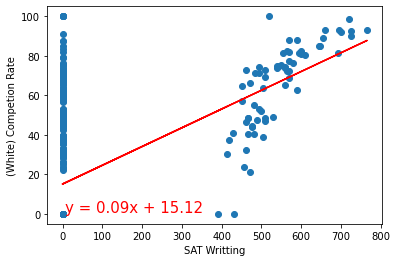

In [9]:
x_values = Data_clean['SAT Writing Midpoint']
y_values = Data_clean['Completion Rate 4 year (White)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('SAT Writting')
plt.ylabel('(White) Competion Rate')
plt.show()

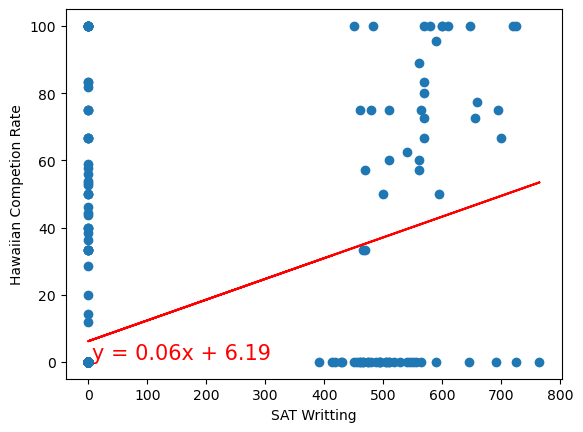

In [26]:
x_values = Data_clean['SAT Writing Midpoint']
y_values = Data_clean['Completion Rate 4 year (Hawaian/Pacific Islander)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('SAT Writting')
plt.ylabel('Hawaiian Competion Rate')
plt.show()

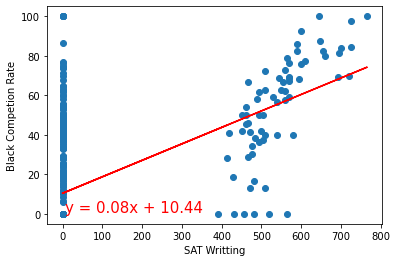

In [10]:
x_values = Data_clean['SAT Writing Midpoint']
y_values = Data_clean['Completion Rate 4 year (Black)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('SAT Writting')
plt.ylabel('Black Competion Rate')
plt.show()

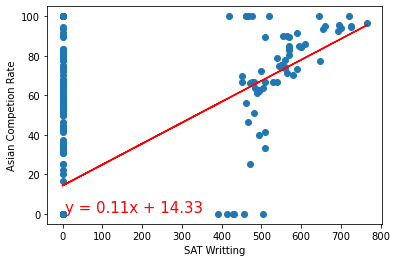

In [11]:
x_values = Data_clean['SAT Writing Midpoint']
y_values = Data_clean['Completion Rate 4 year (Asian)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('SAT Writting')
plt.ylabel('Asian Competion Rate')
plt.show()

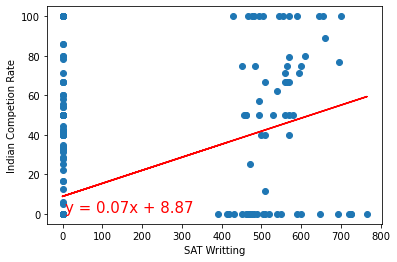

In [12]:
x_values = Data_clean['SAT Writing Midpoint']
y_values = Data_clean['Completion Rate 4 year (American Indian)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('SAT Writting')
plt.ylabel('Indian Competion Rate')
plt.show()